# Particle Swarm Optimization

let $\mathbb{X}^{t} = \left\lbrace \mathbf{x}_1^{t},\ldots,\mathbf{x}_n^{t} \right\rbrace$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(x) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(x) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem. Initialize the velocity for each particle as $\mathbf{v}_{i,j}^{0} = U\left[ - \left|\sup \mathbf{x}_{(\cdot,j)} - \inf \mathbf{x}_{(\cdot,j)}\right|, \left| \sup \mathbf{x}_{(\cdot,j)} - \inf \mathbf{x}_{(\cdot,j)} \right| \right]$. Set $\omega, c_1, c_2 \in [0, 1]$.

For each $\mathbf{x}_{i}^{t} \in \mathbb{X}^{t}$:

1. Update velocity as follows: $\mathbf{v}_{i}^{t+1} = \omega \mathbf{v}_{i} + c_1 r_1 (\mathbf{p}_{i}^{t} - \mathbf{x}_{i}^{t}) + c_2 r_2 (\mathbf{g}^{t} - \mathbf{x}_{i}^{t})$ where $r_1, r_2 \sim U[0, 1]$, $\mathbf{p}_{i}^{t}$ denotes the best known particle for the $i$-th particle and $\mathbf{g}^{t}$ denotes the best known position for the entire swarm (population).

4. **Selection**:
$$\mathbf{x}_{i}^{t+1} = \left\lbrace \begin{array}{l l}
\mathbf{p}_{i}^{t} & \text{DEB}(\mathbf{p}_i^{t}, \mathbf{x}_i^{t}) = \mathbf{p}_{i}^{t} \\
\mathbf{x}_{i}^{t} & \text{otherwise} \end{array}\right.$$

    Where $\text{DEB}(\cdot,\cdot)$ returns the best value between $\mathbf{p}_i^{t}$ and $\mathbf{x}_i^{t}$ according to DEB conditions.

In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)
display_markdown("$\mathbf{{x}}_{{best}}$: {}, $f(\mathbf{{x}}_{{best}})$: {}, ranges: {}".format(x_best, fx_best, ranges), raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

$\mathbf{x}_{best}$: [14.095, 0.8429607892154796], $f(\mathbf{x}_{best})$: -6961.813875580138, ranges: [[13, 100], [0, 100]]

## Initialize Particle Swarm Optimization (PSO)

In [8]:
from pyIpnHeuristic.particleSwarmOptimization import ParticleSwarmOptimization

population_size = 5

particleSwarmOptimization = ParticleSwarmOptimization(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=population_size,
    smooth=False,
    epsilon=10**-4,
    w=0.3,
    c1=0.1,
    c2=1.9
)

particleSwarmOptimization.search(iterations=200000, save_history=True)

## Results

In [9]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in particleSwarmOptimization.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[13.813266034547492, 9.72506880489351]",-1029.319061,0.563468,0,200000,8.886575,5932.494814
1,"[13.813266034547492, 9.72506880489351]",-1029.319061,0.563468,0,199999,8.886575,5932.494814
2,"[13.813266034547492, 9.72506880489351]",-1029.319061,0.563468,0,199998,8.886575,5932.494814
3,"[13.813266034547492, 9.72506880489351]",-1029.319061,0.563468,0,199997,8.886575,5932.494814
4,"[13.813266034547492, 9.72506880489351]",-1029.319061,0.563468,0,199996,8.886575,5932.494814
...,...,...,...,...,...,...,...
199995,"[13.169110996731884, 18.449895304367157]",28.103590,149.485836,0,5,17.631262,6989.917466
199996,"[15.780697681542966, 18.982190149397688]",192.116099,208.353689,0,4,18.217388,7153.929975
199997,"[21.498120989158476, 20.810979060019278]",1520.662995,407.368813,0,3,21.296196,8482.476870
199998,"[21.34147468479464, 29.457634980969576]",2304.798839,750.726754,0,2,29.517977,9266.612714


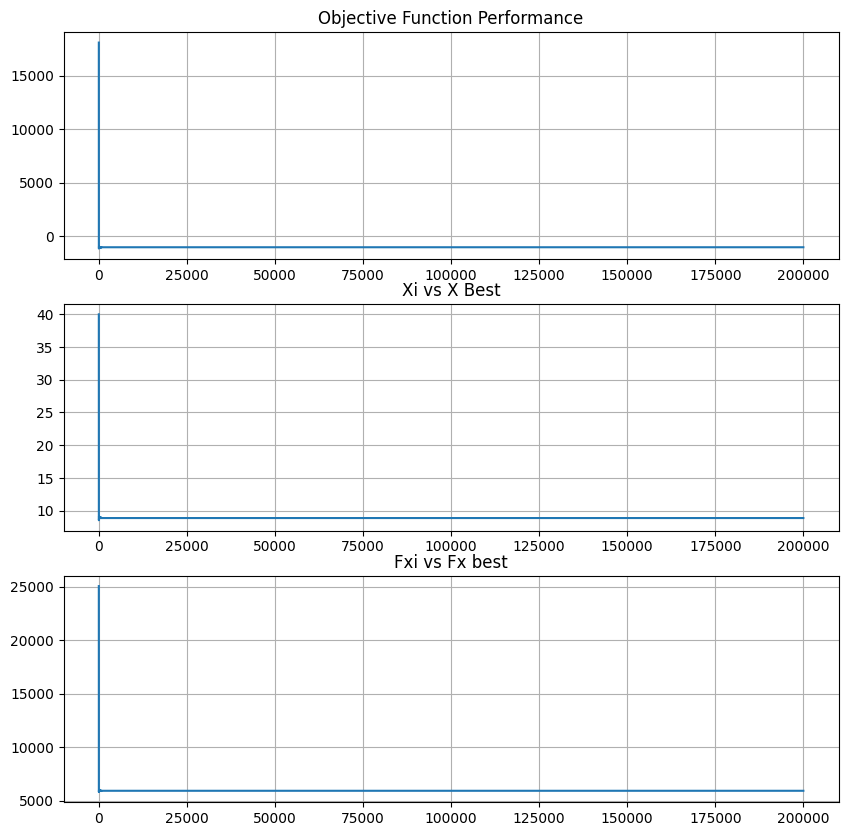

In [10]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in particleSwarmOptimization.history]
display_performance_results(rich_history)